# HW 2 - Prediction and Experimention with Linear Regression 

## Instructions 
In this homework, you are going to predict the price of a house using information like its location, area, no. of rooms etc. You'll use the dataset from the [House Prices - Advanced Regression Techniques](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data) competition on Kaggle and follow a step-by-step process to train your model: 

1. Load and explore the data
2. Prepare the dataset for training
3. Train a linear regression model and evaluate the model

This dataset has a lot of features that your model can use for training -- make sure you read the provided "data_description.txt" for more information on what each column represents. 

---
## 1. Load and Explore Dataset

For this assignment, you will be using the Housing Prices Data Set (stored as "train.csv"). Please read about the dataset carefully before continuing -- it is worth investing a few minutes up front otherwise you are likely to be hopelessly confused!

Use the following commands to load the dataset:

In [447]:
#import statements here 
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#optional import statement -- feel free to comment out
import seaborn as sns

In [448]:
train_df = pd.read_csv("train.csv")

Using this dataset, let's do some simple data exploration to get an idea of what we are working with. 

1. How many rows and columns does the training dataset contain? What are the datatypes for each of the columns? 


2. Now lets explore and visualize the dataset. Becuase we are working with regression, we should examine the relationships between the various columns within the dataset and their relationship with the price of the house. Produce at a minimum a scatter plot and a correlation matrix/heatmap. 


3. Using the plots you created in Question 2, summarize your insights about the dataset. Did you learn anything new about the dataset? Are there particular columns/features you think are important?



In [449]:
pd.set_option('display.max_rows', 1500)

In [450]:
#code goes here
#1-1
print(train_df.shape) # num of rows and columns
print()
print(train_df.dtypes) #datatypes of each column

(1460, 81)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating      

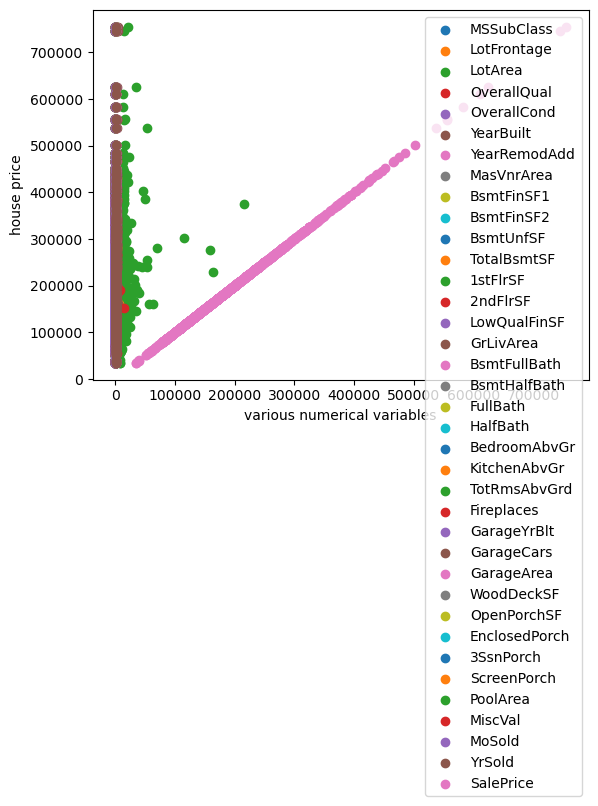

In [451]:
#1-2
new_df = train_df.select_dtypes(exclude=['object']) #only filter non-object data for scatter plot
new_df = new_df.loc[:, ~new_df.columns.isin(['Id'])] 

for i in range(new_df.shape[1]):
    plt.scatter(x = new_df[new_df.columns[i]],
                y = new_df.SalePrice, label= new_df[new_df.columns[i]])
    
plt.xlabel('various numerical variables')
plt.ylabel('house price')
plt.legend(new_df.columns)

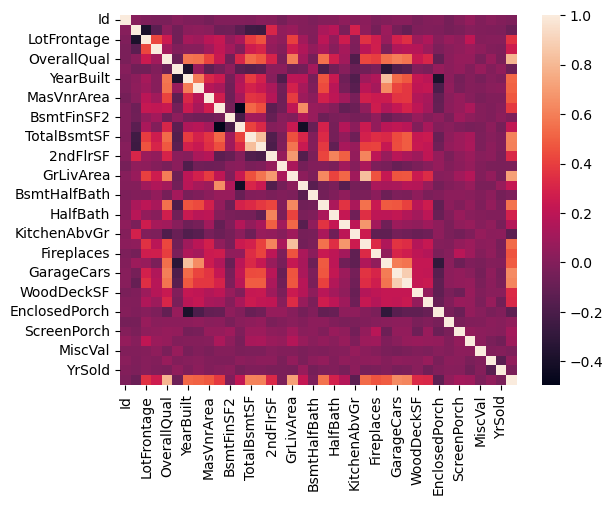

In [452]:
#1-2
sns.heatmap(train_df.corr())
plt.show()

In [453]:
#1-3

Based on the scatter plot, I found that there was a column that shows an increasing, consistent relationship with house price. Also, the heatmap illustrates that there were some columns showing a high or low correlation with each other. Overall, numerical features such as `LotArea` and `LotFrontage` variables are important to predict the `SalePrice`.

## 2. Prepare Dataset for Training

Before we can train a regression model, we first have to clean up and transform our dataset. 

4. The training dataset contains 81 columns, some of which should NOT be used as features for training your model. Identify which two columns should be removed. (*Hint: one of these columns represents your label or output/target that you are trying to predict.*) 
          
      
5. Create two dataframes `features` and `labels`. The `features` dataframe should store the columns containing data that can be used as input to train the model (__NOTE: make sure you do not include the two columns you identified in question 4 in your features dataframe!__). The `labels` dataframe should contain only the target/output column from the dataset. 


6. The next step in data preparation is to identify numeric and categorical columns in your `features` dataframe. We will need this information in later steps to fix any data quality issues (*Hint: to find this information, take a look at the data type of each column*). Create two lists `numeric_cols` and `categorical_cols` that contain the names of the respective numeric and categorical features. 


7. If you take a look at just the numeric data in our `features` dataframe, you might notice that we have some missing values (i.e. `nan`) in the dataset. We can use a technique called [imputation](https://scikit-learn.org/stable/modules/impute.html) to cleverly fill in any missing values. Impute the missing values in the numeric columns of the training datafram using a SimpleImputer with `strategy='mean'`. 
        
    * HINT: The link provided shows some examples using the SimpleImputer function from scikitlearn to do this.
    * HINT: you can access just the numeric columns using the list you created in step 6 like so: `features[numeric_cols]`.


8. Another issue with our numeric data is that the values having varying ranges. As we talked about in class, we often need to normalize or scale numerical values to small ranges (often between 0 and 1) so that no particular feature has a disproportionate impact on the model's performance. Using the `MinMaxScaler` function from `sklearn.preprocessing`, scale the numeric values in your `features` dataframe. If you did this step correctly, then all your numeric values in your feature set should be between 0 and 1. 


9. Our next data issue is that we also are dealing with a mix of categorial and numerical data. In general, most machine learning packages require you to encode categorial data into numbers. Luckily, scikit-learn has a function that will do that for us. Encode categorical columns in the dataset using `OneHotEncoder` from `sklearn.preprocessing`.  

    * NOTE: you might need to add new columns to your feature dataset to caputure all the one-hot vectors returned by the function. To do this, you might need a line of code that does something like this: 
    
    `#assuming you store your encoder in a variable named encoder
    features[encoder.get_feature_names(categorical_cols)] = encoder.transform(features[categorical_cols])`


10. Double check that all your transformations and data cleaning have worked. Print out how many nan values `features` has (it should be zero) and print out how many columns contain categorical data (also should now be zero). 

In [454]:
#code goes here 
#2-4

`SalePrice` and `Id` variables should be removed since each variable represent target and label.

In [455]:
#2-5
features = train_df.loc[:, ~train_df.columns.isin(['SalePrice', 'Id'])] 
labels = train_df.loc[:, train_df.columns.isin(['SalePrice'])]

In [456]:
#2-6
numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = features.select_dtypes(include=['object']).columns.tolist()

In [457]:
#2-7
imp = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imp.fit(features[numeric_cols])
features[numeric_cols] = imp.transform(features[numeric_cols])

C:\Users\stlp\AppData\Local\Temp\ipykernel_13508\2775545485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[numeric_cols] = imp.transform(features[numeric_cols])


In [458]:
#2-8
scaler = MinMaxScaler()
scaler.fit(features[numeric_cols])
features[numeric_cols] = scaler.transform(features[numeric_cols])

C:\Users\stlp\AppData\Local\Temp\ipykernel_13508\3136769841.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[numeric_cols] = scaler.transform(features[numeric_cols])


In [459]:
#2-9
encoder = OneHotEncoder(sparse = False)
encoder.fit(features[categorical_cols])
features[encoder.get_feature_names(categorical_cols)] = encoder.transform(features[categorical_cols])

C:\Users\stlp\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
C:\Users\stlp\AppData\Local\Temp\ipykernel_13508\2550629181.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features[encoder.get_feature_names(categorical_cols)] = encoder.transform(features[categorical_cols])
C:\Users\stlp\AppData\Local\Temp\ipykernel_13508\2550629181.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using 

C:\Users\stlp\AppData\Local\Temp\ipykernel_13508\2550629181.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features[encoder.get_feature_names(categorical_cols)] = encoder.transform(features[categorical_cols])
C:\Users\stlp\AppData\Local\Temp\ipykernel_13508\2550629181.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  features[encoder.get_feature_names(categorical_cols)] = encoder.transform(features[categorical_cols])
C:\Users\stlp\AppData\Local\Temp\ipykernel_13508\2550629181.py:4: PerformanceWarning: DataFrame is highly 

In [460]:
#2-10
features = features.fillna(0)
print(features.isna().sum())

MSSubClass               0
MSZoning                 0
LotFrontage              0
LotArea                  0
Street                   0
Alley                    0
LotShape                 0
LandContour              0
Utilities                0
LotConfig                0
LandSlope                0
Neighborhood             0
Condition1               0
Condition2               0
BldgType                 0
HouseStyle               0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
RoofStyle                0
RoofMatl                 0
Exterior1st              0
Exterior2nd              0
MasVnrType               0
MasVnrArea               0
ExterQual                0
ExterCond                0
Foundation               0
BsmtQual                 0
BsmtCond                 0
BsmtExposure             0
BsmtFinType1             0
BsmtFinSF1               0
BsmtFinType2             0
BsmtFinSF2               0
BsmtUnfSF                0
T

In [461]:
#2-10
features = features.drop(categorical_cols, axis = 1)
print(features.select_dtypes(include = 'object').sum()) #None

Series([], dtype: float64)


## 3. Training and Validating our Regression Model

Before we can train our model, we need to split the dataset into training and test/validation sets. Because we will need to train our model multiple times to get an average performance, we will need to do this split multiple times. We are going to be using the technique called k-fold cross validation to do this. Note -- you are NOT allowed to use the `cross_val_score` or the `cross_validate` functions to do this. 


11. Split your dataset into 10 folds for training/testing sets using the `KFold` function from `sklearn`. This [documentation](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold) has more details on how to do this. 


12. Iterate over the 10 folds from Question 11, and train a linear regression model using each of the test/train splits produced by KFold. For each fold, generate predictions and compute the mean squared error for the training and validation/test sets. 


13. Now report the average training and testing error across all of the folds. 


Without a baseline, it is hard to tell if our model doing well. We need to compare our traing/testing errors against something to get an idea for how good the performance is. Typically, we use a "naive" or "dummy" model to compare the performance against. Because we are using a regression model to compare against, we should use the [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) model here. *NOTE -- "naive" here refers to a simple model, this is not the same thing as the "Naive Bayes"*

14. Explain what the `DummyRegressor` model does. Then use the `DummyRegressor` with `strategy='mean'` to get an average baseline performance to compare against. You'll need to iterate over the exact same training/test splits you created in Question 11 and then get the average training/testing error. 


15. How well did our linear regression model do compared to the `DummyRegressor` model? Do you think our linear regression model is learning? Why or why not? 



In [462]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

#code goes here

In [463]:
#3-11
k = 10
kf = KFold(n_splits = k)

for train, test in kf.split(features, labels):
    print("%s %s" % (train, test))

[ 146  147  148 ... 1457 1458 1459] [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145]
[   0    1    2 ... 1457 1458 1459] [146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 2

In [464]:
#3-12
mses = 0
 
for train, test in kf.split(features, labels):
    X_train, X_test = features.iloc[train], features.iloc[test]
    y_train, y_test = labels.iloc[train], labels.iloc[test]

    m = LinearRegression().fit(X_train, y_train)
    y_pred = m.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mses = mses + mse
    print(mse)

8.079529391533789e+24
2.9988363207952086e+28
1.2321778767520602e+30
1.2697699638298613e+28
1.6201489386774606e+28
1.1718127679656265e+28
1.0501653075008339e+29
4.480959323142604e+28
6.33794945773281e+29
2.7039786424296295e+28


In [465]:
#3-13
avg_mse = mses / k

print(avg_mse)

2.1134524923732203e+29


In [466]:
#3-14

`DummyRegressor` draws predictions based on a simple model that cares less about the input data.

In [467]:
#3-14
dummy_regr = DummyRegressor(strategy = "mean")

mses = 0
 
for train, test in kf.split(features, labels):
    X_train, X_test = features.iloc[train], features.iloc[test]
    y_train, y_test = labels.iloc[train], labels.iloc[test]

    m = dummy_regr.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mses = mses + mse
    print(mse)

avg_mse = mses / k

print()
print(avg_mse)

4689458147.355089
6401908654.334932
6284630203.243852
6867131797.263987
9290300496.812855
5899555855.682998
5212615982.632457
5071297427.828335
8162691477.634468
5272688283.3156185

6315227832.610458


In [468]:
#3-15

Our linear regression model generates significantly larger MSEs compared to DummyRegressor model, meaning that the regression model did not predict pretty well. Therefore, I do not think that our linear regression model is learning properly based on their training/testing errors.